TIC TAC TOE DATASET

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
# Import dataset
dataset = pd.read_csv('tic-tac-toe.csv')
dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      958 non-null    int64 
 1   'top-left-square'       958 non-null    object
 2   'top-middle-square'     958 non-null    object
 3   'top-right-square'      958 non-null    object
 4   'middle-left-square'    958 non-null    object
 5   'middle-middle-square'  958 non-null    object
 6   'middle-right-square'   958 non-null    object
 7   'bottom-left-square'    958 non-null    object
 8   'bottom-middle-square'  958 non-null    object
 9   'bottom-right-square'   958 non-null    object
 10  'Class'                 958 non-null    object
dtypes: int64(1), object(10)
memory usage: 82.5+ KB


In [ ]:
X = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9:10].values

In [ ]:
le = LabelEncoder()
for col in dataset.columns:
    dataset[col] = le.fit_transform(dataset[col])

X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

# Onehot encode all dependent categorical variables
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X)
X = pca.transform(X)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")
label = kmeans.fit_predict(X)

print(label)


[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 3 3 3 3 3 2 0 1 2 2 3 2 2 2 3 2 3 3 2 3 3 3 3 3 2 3 2 3 2 3
 2 3 3 3 1 1 3 3 3 3 3 0 1 1 1 1 1 3 3 3 3 0 0 0 0 3 3 3 3 3 3 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 1 2 1 1 1 0 1 1 1 1 1 1 3 3 0 1 1 1 3 3 1 3 3 0 1 1 1 3 3 3 1 3 3
 2 0 0 2 3 2 2 3 2 2 0 0 0 3 3 2 2 3 2 0 0 0 0 2 0 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 2 1 1 0 0 1 0 0
 1 0 0 2 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1
 1 1 1 3 3 2 2 3 2 0 0 0 

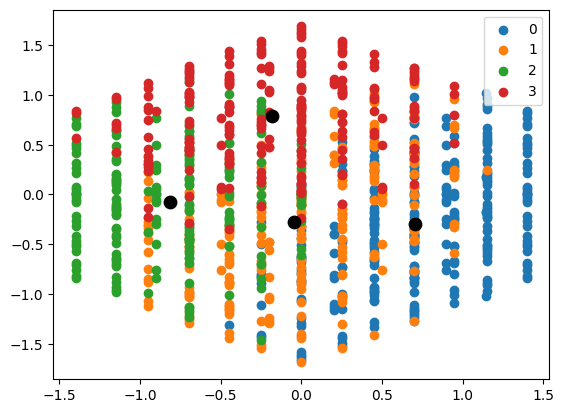

In [ ]:
#Getting the Centroids
from matplotlib import pyplot as plt

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(
    n_components=None,
)
X_tr = lda.fit_transform(X,Y)


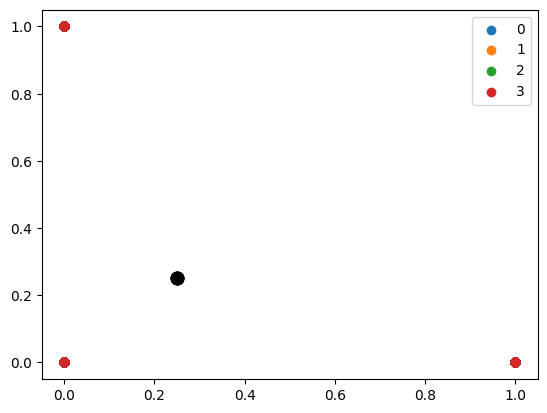

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")
label = kmeans.fit_predict(X)

from matplotlib import pyplot as plt

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

CAR EVALUATION DATASET

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

dataset = pd.read_csv('car_evaluation.csv', names=col_names)

X=dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values
dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: >

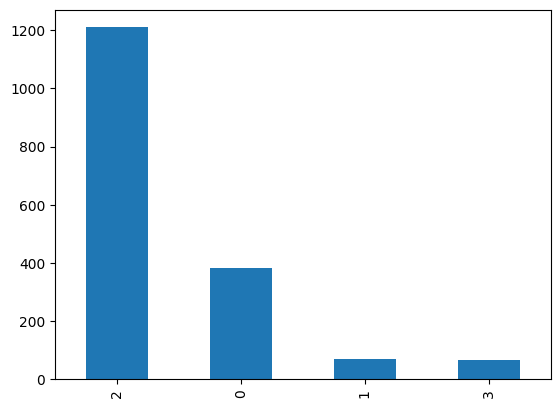

In [ ]:
dataset['class'].value_counts().plot(kind="bar")

In [ ]:
feature_names = list(dataset.columns.values[:-1])
for feature in feature_names:
    unique_count = dataset[feature].nunique()
    unique_vals = dataset[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

buying: 4 values, [3 0 2 1]
maint: 4 values, [3 0 2 1]
doors: 4 values, [0 1 2 3]
persons: 3 values, [0 1 2]
lug_boot: 3 values, [2 1 0]
safety: 3 values, [1 2 0]


In [ ]:
label_name = dataset.columns.values[-1]
print("{}: {} values, {}".format(label_name, dataset[label_name].nunique(), dataset[label_name].unique()))
dataset[label_name].value_counts()


class: 4 values, [2 0 3 1]


2    1210
0     384
1      69
3      65
Name: class, dtype: int64

In [ ]:
dataset=dataset.iloc[:,:-1]
dataset.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [ ]:
print(dataset['buying'])

0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: buying, Length: 1728, dtype: object


In [ ]:
label_encoder = LabelEncoder()
for column in dataset.columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

scaler = StandardScaler()
data_encoded = scaler.fit_transform(dataset)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(
    n_components=None,
)
X_tr = lda.fit_transform(data_encoded,Y)


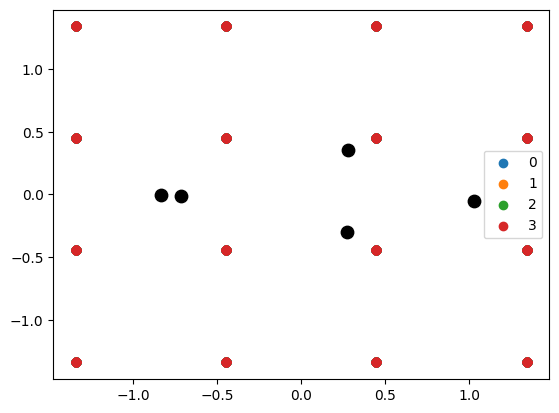

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
clusters = kmeans.fit_predict(data_encoded)
from matplotlib import pyplot as plt

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(data_encoded[label == i , 0] , data_encoded[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data_encoded)
data_encoded = pca.transform(data_encoded)

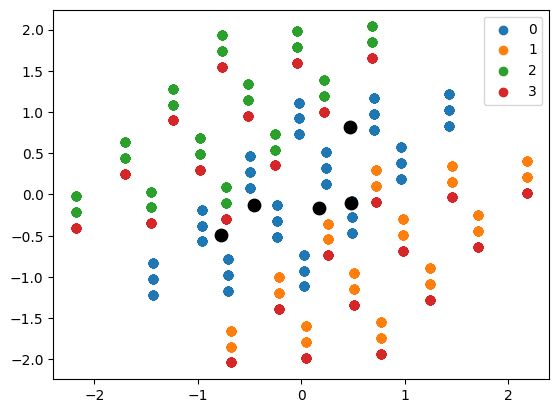

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
clusters = kmeans.fit_predict(data_encoded)
from matplotlib import pyplot as plt

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(data_encoded[label == i , 0] , data_encoded[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()